In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from meteostat import Stations, Daily
from tqdm import tqdm
import time
warnings.filterwarnings("ignore")

In [ ]:
def load_csv_file(filename):
    return pd.read_csv(filename)
df_train = load_csv_file("data/Train.csv")
df_test =  load_csv_file("data/Test.csv")

In [11]:
def get_commmon_columns():
    return ['id', 'date', 'flight_id', 'departure_point', 'arrival_point', 'departure_time', 'arrival_time', 'flight_status', 'aircraft_code']

def rename_colums(df_train, extra_columns):
    columns = get_commmon_columns() + extra_columns
    df_train.columns = columns
    return df_train

In [17]:
get_commmon_columns()

['id',
 'date',
 'flight_id',
 'departure_point',
 'arrival_point',
 'departure_time',
 'arrival_time',
 'flight_status',
 'aircraft_code']

In [25]:
def rename_colums(df_test, extra_columns):
    columns = get_commmon_columns() + extra_columns
    df_test.columns = columns
    return df_test

In [22]:
df_train = rename_colums(df_train, ['target'])

In [23]:
df_train

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [31]:
df_test = rename_colums(df_test,[])

In [32]:
df_test

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [33]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)

In [34]:
df_combined

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
117161,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV,NaN
117162,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG,NaN
117163,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA,NaN
117164,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD,NaN


In [72]:
df_combined['flight_status'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [36]:
airport_cou_city_continent = pd.read_csv("data/airport_with_full_continents.csv", encoding='latin1')

In [37]:
airport_cou_city_continent

,IATA_Code,Country,City,Continent
0,AAE,Algeria,Annaba,Africa
1,AAL,Denmark,Aalborg,Europe
2,ABJ,Ivory Coast,Abidjan,Africa
3,ADB,Turkey,Izmir,Asia
4,AHU,Morocco,Al Hoceima,Africa
...,...,...,...,...
125,VKO,Russia,Moscow,Europe
126,VNO,Lithuania,Vilnius,Europe
127,VRN,Italy,Verona,Europe
128,YUL,Canada,Montreal,North America


In [38]:
# Merge airport info to df_combined for both departure and arrival airports

# Map departure_point
df_combined = df_combined.merge(
    airport_cou_city_continent.rename(columns={'IATA_Code': 'departure_point'}),
    how='left',
    on='departure_point',
    suffixes=('', '_dep')
)

# Map arrival_point
df_combined = df_combined.merge(
    airport_cou_city_continent.rename(columns={'IATA_Code': 'arrival_point'}),
    how='left',
    on='arrival_point',
    suffixes=('', '_arr')
)

# Now df_combined has country, city, continent info for both departure and arrival airports

In [39]:
df_combined

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,Country,City,Continent,Country_arr,City_arr,Continent_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,Morocco,Casablanca,Africa,Tunisia,Tunis,Africa
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,Italy,Milan,Europe,Tunisia,Tunis,Africa
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,Tunisia,Tunis,Africa,Turkey,Istanbul,Asia
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,Tunisia,Djerba,Africa,France,Nantes,Europe
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,Tunisia,Tunis,Africa,Algeria,Algiers,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117161,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV,NaN,Tunisia,Tunis,Africa,France,Nice,Europe
117162,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG,NaN,Tunisia,Tunis,Africa,Tunisia,Tunis,Africa
117163,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA,NaN,Bosnia and Herzegovina,Sarajevo,Europe,Tunisia,Tunis,Africa
117164,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD,NaN,Tunisia,Tunis,Africa,Tunisia,Djerba,Africa


In [84]:
#unique flight id
df_combined['flight_id'].nunique()

1912

In [80]:
# Map flight_status codes to their actual meaning
status_map = {
    'ATA': 'ATA - Actual Time of Arrival',
    'DEP': 'DEP - Departed',
    'RTR': 'RTR - Ready to Return',
    'SCH': 'SCH - Scheduled',
    'DEL': 'DEL - Delayed'
}

df_combined['flight_status_meaning'] = df_combined['flight_status'].map(status_map)

In [81]:
# Count of each flight status
flight_status_counts = df_combined['flight_status_meaning'].value_counts().reset_index()
flight_status_counts.columns = ['Flight Status', 'Number of Flights']
flight_status_counts

,Flight Status,Number of Flights
0,ATA - Actual Time of Arrival,101706
1,SCH - Scheduled,14470
2,DEP - Departed,504
3,RTR - Ready to Return,317
4,DEL - Delayed,169


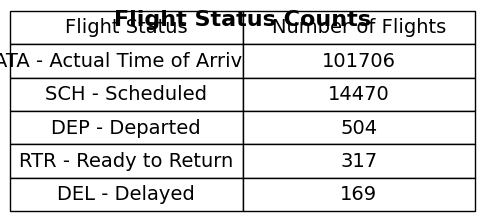

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
table = ax.table(
    cellText=flight_status_counts.values,
    colLabels=flight_status_counts.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)  # Adjust scale as needed
plt.title('Flight Status Counts', fontsize=16, fontweight='bold')
plt.show()

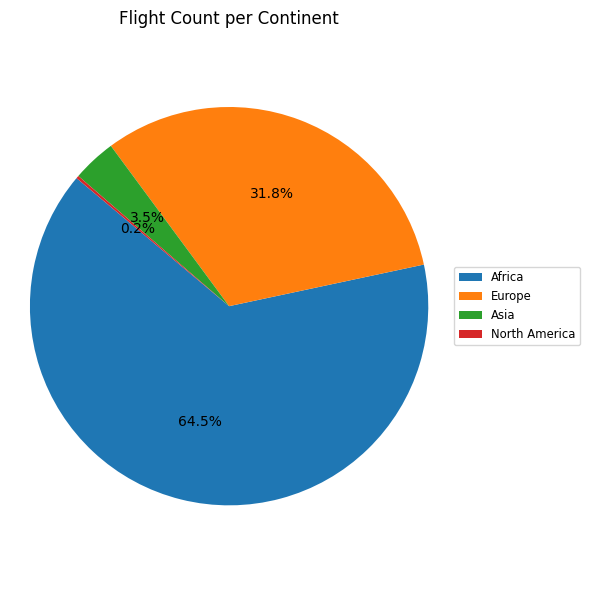

In [58]:
continent_cou = df_combined['Continent'].value_counts().reset_index()
continent_cou.columns = ['Continent', 'count']
# Pie chart of flight counts per continent with legend outside and default color scheme
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    continent_cou['count'],
    labels=None,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Flight Count per Continent')
plt.axis('equal')
plt.legend(
    patches,
    continent_cou['Continent'],
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize='small'
)
plt.tight_layout()
plt.show()

In [60]:
city_cou = df_combined['City'].value_counts().reset_index().head(10)
city_cou

,City,count
0,Tunis,46143
1,Djerba,11178
2,Paris,8598
3,Monastir,5770
4,Marseille,3088
5,Lyon,2549
6,Nice,2419
7,Algiers,1702
8,Milan,1663
9,Istanbul,1567


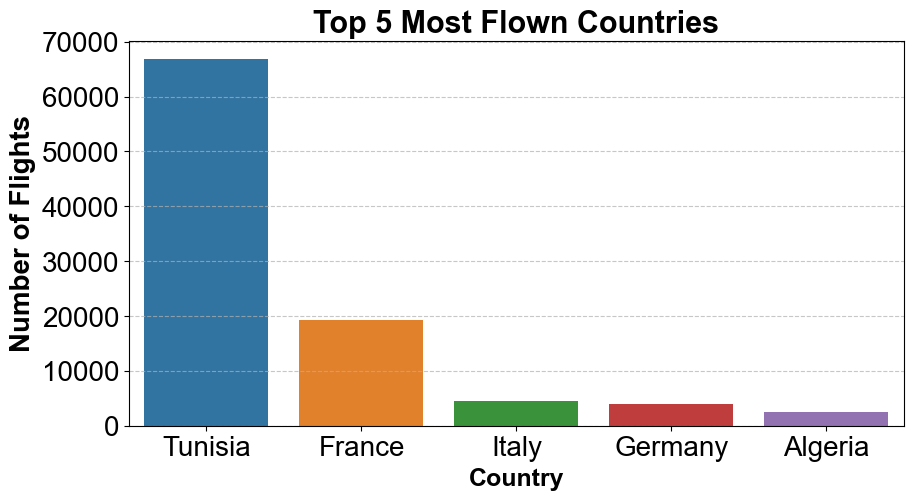

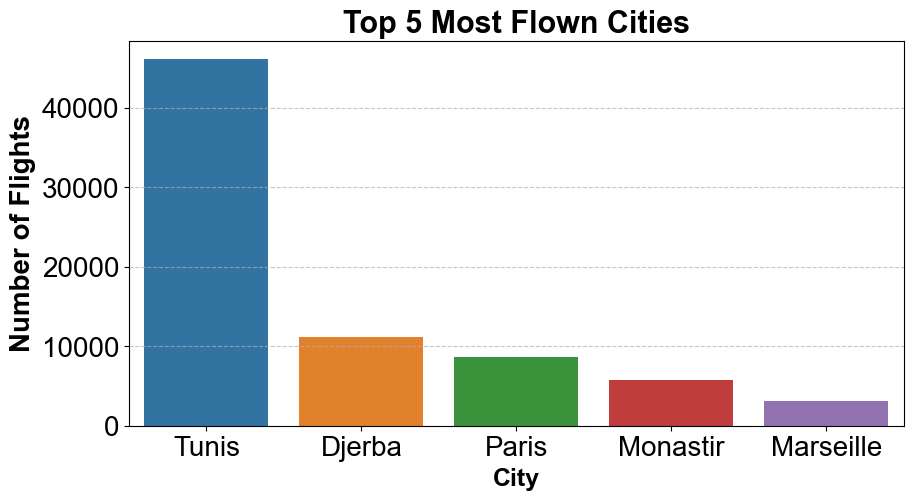

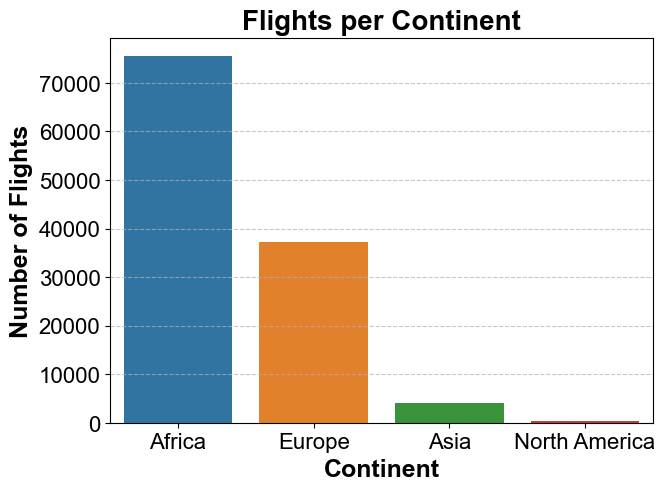

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

label_fontsize = 18  # Change this value to adjust label size
title_fontsize = 20  # Change this value to adjust title size
tick_fontsize = 16   # Change this value to adjust tick size

plt.rcParams['font.family'] = 'Arial'  # or 'sans-serif', 'monospace', etc.

# Country
country_cou = df_combined['Country'].value_counts().reset_index()
country_cou.columns = ['Country', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='Country', y='count', data=country_cou.head(5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Country', fontsize=label_fontsize, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=20, fontweight='bold')
plt.title('Top 5 Most Flown Countries', fontsize=22, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# City
city_cou = df_combined['City'].value_counts().reset_index()
city_cou.columns = ['City', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='count', data=city_cou.head(5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=label_fontsize, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=20, fontweight='bold')
plt.title('Top 5 Most Flown Cities', fontsize=22, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Continent
continent_cou = df_combined['Continent'].value_counts().reset_index()
continent_cou.columns = ['Continent', 'count']
plt.figure(figsize=(7, 5))
sns.barplot(x='Continent', y='count', data=continent_cou)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlabel('Continent', fontsize=label_fontsize, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=label_fontsize, fontweight='bold')
plt.title('Flights per Continent', fontsize=title_fontsize, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [137]:
df_combined['City'].nunique()

126

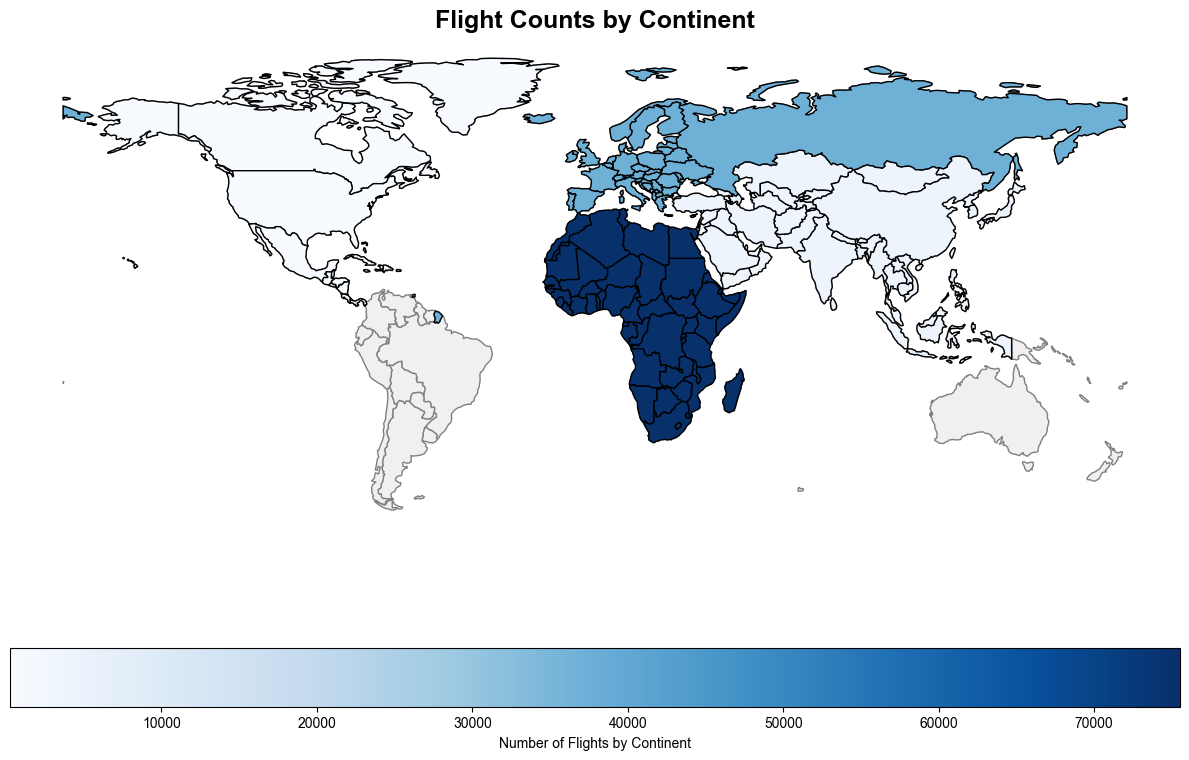

In [105]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load world map from Natural Earth (downloaded file)
world = gpd.read_file("data/naturalearth/ne_110m_admin_0_countries.shp")

# Remove Antarctica from world and continent data
world = world[world['CONTINENT'] != 'Antarctica']
continent_cou = df_combined['Continent'].value_counts().reset_index()
continent_cou.columns = ['Continent', 'count']
continent_cou = continent_cou[continent_cou['Continent'] != 'Antarctica']

# Merge flight counts with world map data
world_continent = world[['CONTINENT', 'geometry']].drop_duplicates()
world_continent = world_continent.merge(continent_cou, left_on='CONTINENT', right_on='Continent', how='left')

# Plot with a blue color scheme (light blue = most flights, dark blue = least)
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="#f0f0f0", edgecolor='gray')
world_continent.dropna(subset=['count']).plot(
    ax=ax, column='count', cmap='Blues', legend=True,  # 'Blues' (not reversed): high values are light blue
    legend_kwds={'label': "Number of Flights by Continent", 'orientation': "horizontal"},
    edgecolor='black'
)
plt.title('Flight Counts by Continent', fontsize=18, fontweight='bold', color="#000000")
plt.axis('off')
plt.tight_layout()
plt.show()

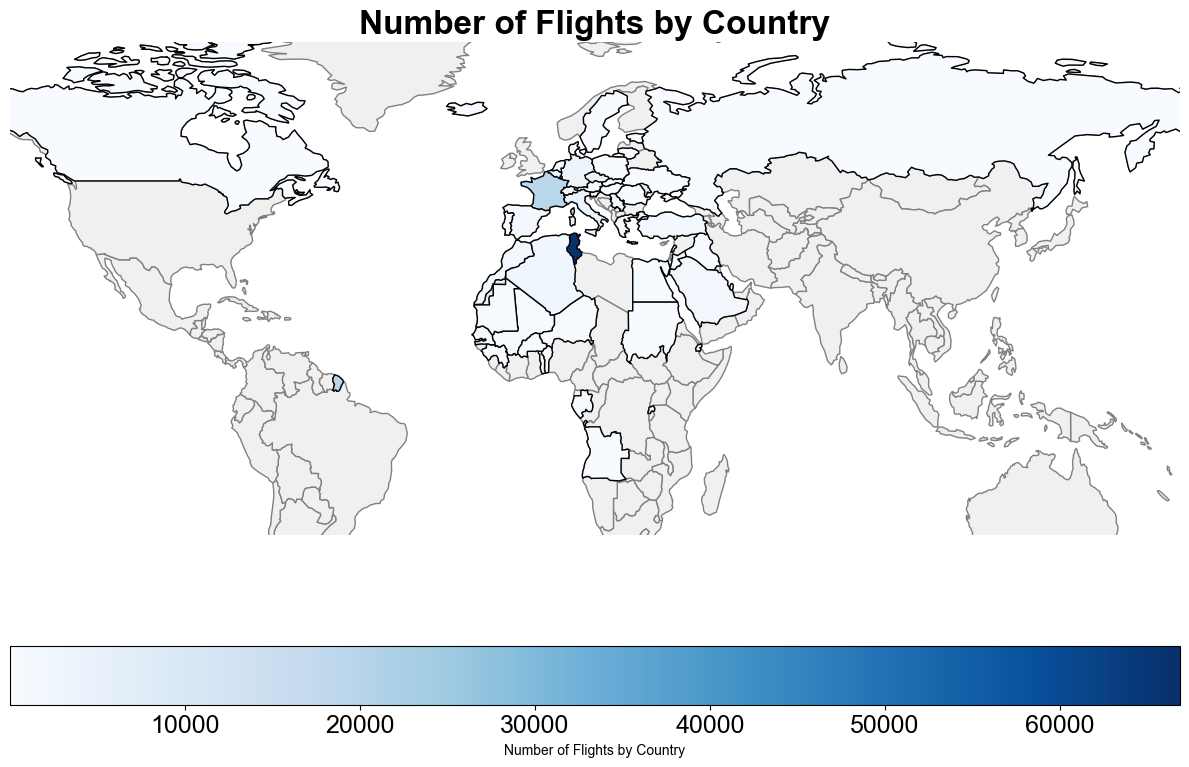

In [135]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load world map from Natural Earth (downloaded file)
world = gpd.read_file("data/naturalearth/ne_110m_admin_0_countries.shp")

# Remove Antarctica from world and country data
world = world[world['CONTINENT'] != 'Antarctica']
country_cou = df_combined['Country'].value_counts().reset_index()
country_cou.columns = ['Country', 'count']
country_cou = country_cou[country_cou['Country'] != 'Antarctica']

# Merge flight counts with world map data
world_country = world[['NAME', 'geometry']].drop_duplicates()
world_country = world_country.merge(country_cou, left_on='NAME', right_on='Country', how='left')

# Plot with a blue color scheme (light blue = most flights, dark blue = least)
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="#f0f0f0", edgecolor='gray')
cbar = world_country.dropna(subset=['count']).plot(
    ax=ax, column='count', cmap='Blues', legend=True,
    legend_kwds={'label': "Number of Flights by Country", 'orientation': "horizontal"},
    edgecolor='black'
)
plt.title('Number of Flights by Country', fontsize=24, fontweight='bold', color="#000000")
plt.axis('off')
plt.tight_layout()

# Zoom in: set xlim and ylim to focus on main continents (adjust as needed)
ax.set_xlim(-140, 170)  # longitude
ax.set_ylim(-30, 80)    # latitude

# Make colorbar tick labels bigger
cbar_ = ax.get_figure().axes[-1]  # get the colorbar axis
cbar_.tick_params(labelsize=18)

plt.show()

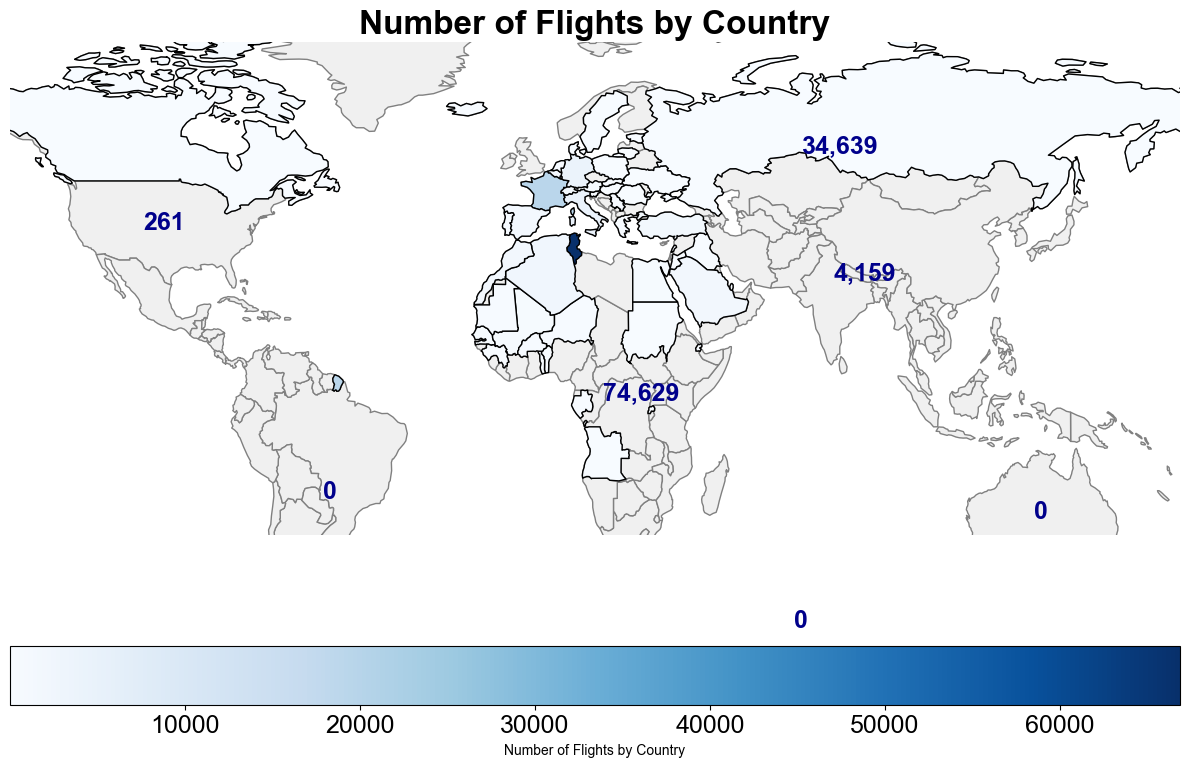

In [138]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load world map from Natural Earth (downloaded file)
world = gpd.read_file("data/naturalearth/ne_110m_admin_0_countries.shp")

# Remove Antarctica from world and country data
world = world[world['CONTINENT'] != 'Antarctica']
country_cou = df_combined['Country'].value_counts().reset_index()
country_cou.columns = ['Country', 'count']
country_cou = country_cou[country_cou['Country'] != 'Antarctica']

# Merge flight counts with world map data
world_country = world[['NAME', 'geometry', 'CONTINENT']].drop_duplicates()
world_country = world_country.merge(country_cou, left_on='NAME', right_on='Country', how='left')

# Calculate total flights per continent
continent_totals = world_country.groupby('CONTINENT')['count'].sum().reset_index()

# Get representative point for each continent for annotation
continent_geoms = world.dissolve(by='CONTINENT').reset_index()
continent_geoms['coords'] = continent_geoms['geometry'].representative_point().apply(lambda x: (x.x, x.y))
coords_dict = dict(zip(continent_geoms['CONTINENT'], continent_geoms['coords']))

# Plot with a blue color scheme (light blue = most flights, dark blue = least)
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="#f0f0f0", edgecolor='gray')
cbar = world_country.dropna(subset=['count']).plot(
    ax=ax, column='count', cmap='Blues', legend=True,
    legend_kwds={'label': "Number of Flights by Country", 'orientation': "horizontal"},
    edgecolor='black'
)
plt.title('Number of Flights by Country', fontsize=24, fontweight='bold', color="#000000")
plt.axis('off')
plt.tight_layout()

# Zoom in: set xlim and ylim to focus on main continents (adjust as needed)
ax.set_xlim(-140, 170)  # longitude
ax.set_ylim(-30, 80)    # latitude

# Make colorbar tick labels bigger
cbar_ = ax.get_figure().axes[-1]  # get the colorbar axis
cbar_.tick_params(labelsize=18)

# Annotate total flights per continent
for _, row in continent_totals.iterrows():
    continent = row['CONTINENT']
    total = int(row['count']) if not pd.isna(row['count']) else 0
    if continent in coords_dict:
        x, y = coords_dict[continent]
        ax.text(x, y, f"{total:,}", fontsize=18, fontweight='bold', color='darkblue', ha='center', va='center')

plt.show()